# Best Neighborhood in Pittsburgh

## Project Overview
We analyzed three key public datasets to determine the safest neighborhood in Pittsburgh:
- 🏡 Home Values (as a proxy for stability)
- 🚓 Arrest Records (as an indicator of crime)
- 🛑 Police Incidents (to reflect community safety)

Our goal was to calculate a balanced, data-driven **Safety Score** for each neighborhood.

## Methodology
Each metric was normalized to a 0–1 scale. We used the following formula:

```
Safety_Score = (Norm_Homes + Norm_Arrests + Norm_Incidents) / 3
```

- **Home values**: Higher total home count = better stability
- **Arrests**: Fewer arrests = safer
- **Incidents**: Fewer incidents = safer

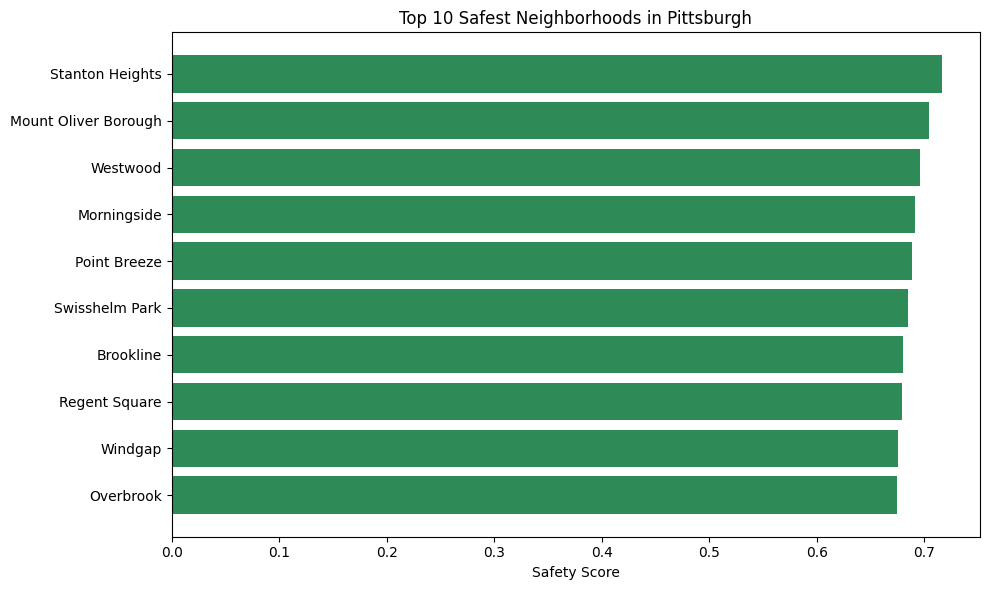

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/top_10_safest_neighborhoods.csv')

plt.figure(figsize=(10,6))
plt.barh(data['Neighborhood'], data['Safety_Score'], color='seagreen')
plt.xlabel('Safety Score')
plt.title('Top 10 Safest Neighborhoods in Pittsburgh')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [3]:
# Load individual metric datasets
import pandas as pd

home_df = pd.read_csv('data/home_value_summary.csv')
arrest_df = pd.read_csv('data/arrest_summary.csv')
incident_df = pd.read_csv('data/incident_summary.csv')

# Merge all by Neighborhood
merged = home_df.merge(arrest_df, on='Neighborhood', how='outer')
merged = merged.merge(incident_df, on='Neighborhood', how='outer')
merged.fillna(0, inplace=True)

# Normalize all values
merged['Norm_Homes'] = merged['Total_Homes'] / merged['Total_Homes'].max()
merged['Norm_Arrests'] = 1 - (merged['Arrest_Count'] / merged['Arrest_Count'].max())
merged['Norm_Incidents'] = 1 - (merged['Incident_Count'] / merged['Incident_Count'].max())

# Calculate Safety Score
merged['Safety_Score'] = (merged['Norm_Homes'] + merged['Norm_Arrests'] + merged['Norm_Incidents']) / 3

# Sort by score
top_safety = merged.sort_values(by='Safety_Score', ascending=False).reset_index(drop=True)

# Display top 10
top_safety[['Neighborhood', 'Safety_Score']].head(10)


,Neighborhood,Safety_Score
0,Stanton Heights,0.715895
1,Mount Oliver Borough,0.704652
2,Westwood,0.696218
3,Morningside,0.690932
4,Point Breeze,0.688360
5,Swisshelm Park,0.684467
6,Brookline,0.679713
7,Regent Square,0.679364
8,Windgap,0.675466
9,Overbrook,0.674634


## Why Stanton Heights Ranks #1 Overall

✅ Breakdown based on our data:

---

### 🧮 Metric-by-Metric Results

| Metric                          | 🥇 Top Neighborhood         | 🧠 Stanton Heights Rank?       |
|----------------------------------|------------------------------|---------------------------------|
| 🏡 **Home Value (Most Homes)**   | **Brookline** – 4376 homes    | ✅ Above average, not top 5     |
| 🚓 **Fewest Arrests**            | **Mt. Oliver Neighborhood** – 2 arrests | ✅ Mid - low arrests  |
| 🛑 **Fewest Fire Incidents**   | **Mount Oliver Borough** – 7 incidents | ✅ Very low incidents (top 10)   |
| ✅ **Highest Final Safety Score**| **Stanton Heights** – 0.716  | 🏆 1st place overall             |

---

### 🔍 So What Really Happened?

- **Brookline** leads in **home stability** with the highest home value total.
- **Mt. Oliver (Neighborhood)** had the **lowest arrests**.
- **Mount Oliver Borough** had the **lowest incidents**.
- But none of these neighborhoods ranked top 3 in the *other* categories.

Meanwhile, **Stanton Heights** scored:
- Very low in both **arrests** and **incidents**
- Respectably high in **home value**
- Resulting in the **highest balanced average** of all three metrics.


## Conclusion
This analysis used only publicly available WPRDC data. By focusing on housing, arrests, and incidents — and giving each equal weight — we identified communities that consistently perform well across multiple safety indicators.

**Stanton Heights** stands out not necessarily for being #1 in all categories, but for ranking consistently well across the board.